<a href="https://colab.research.google.com/github/diegosol127/CSCE-636-Deep-Learning/blob/main/Homework/CSCE_636_HW02_Sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HOMEWORK 02

**Submitted by: Diego Sol**

CSCE 636-600: Deep Learning

Professor: Dr. Anxiao Jiang

Import packages

In [43]:
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras.datasets import imdb
from tensorflow.keras import layers

## Task 1

**Check out the Jupyter notebook for Chapter 3 at https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/chapter03_introduction-to-keras-and-tf.ipynb. Then, use the "GraidentTape API" to find the derivative of the function f(x) = sin(x) for x = 0, 0.1, 0.2 and 0.3. Submit your Jupyter notebook that shows both the code and the result you got. (10 points)**

In [44]:
# values of x
x0 = 0.0
x1 = 0.1
x2 = 0.2
x3 = 0.3
# create a 1-D tensor that contain the values of x
input_var = tf.Variable(initial_value=[x0, x1, x2, x3])

# use GradientTape to calculate the derivative
with tf.GradientTape() as tape:
  result = tf.sin(input_var)
gradient = tape.gradient(result, input_var)

# print the results
tf.print('For the function f(x) = sin(x):')
for ii in range(input_var.shape[0]):
  tf.print('df/dx at x =', input_var[ii], 'is', gradient[ii])

For the function f(x) = sin(x):
df/dx at x = 0 is 1
df/dx at x = 0.1 is 0.995004177
df/dx at x = 0.2 is 0.980066597
df/dx at x = 0.3 is 0.955336511


## Task 2

**Check out the Jupyter notebook for Chapter 4 at https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/chapter04_getting-started-with-neural-networks.ipynb. Then, for the task "Classifying movie reviews: A binary classification example", tune the hyper-parameters of the model (such as changing the number of layers, changing the sizes of layers, changing the optimizer, changing the learning rate, etc.), and see if you can improve the model's performance. Submit a Jupyter notebook where you clearly show the code with the best hyper-parameters that you have found, along with its performance on training, validation and test sets. (10 points)**

Load the IMBD dataset

In [45]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

Multi-hot encode the integer sequences

In [46]:
import numpy as np

# function that turns lists into a vector of 0s and 1s
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

# vectorize data (inputs) for training and testing
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# vectorize labels (outputs) for training and testing
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

Build the model

In [47]:
# model definition
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# compile the model
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

Create a validation set

In [48]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Train the model

In [49]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 45ms/step - loss: 0.5195 - accuracy: 0.7797 - val_loss: 0.4018 - val_accuracy: 0.8456
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3067 - accuracy: 0.9035 - val_loss: 0.3035 - val_accuracy: 0.8885
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2209 - accuracy: 0.9281 - val_loss: 0.3350 - val_accuracy: 0.8605
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1757 - accuracy: 0.9445 - val_loss: 0.2738 - val_accuracy: 0.8884
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1393 - accuracy: 0.9553 - val_loss: 0.2993 - val_accuracy: 0.8833
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1147 - accuracy: 0.9647 - val_loss: 0.2975 - val_accuracy: 0.8832
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0953 - accuracy: 0.9709 - val_loss: 0.3282 - val_accuracy: 0.8800
Epoch 8/20
30

Plot the training and validation loss

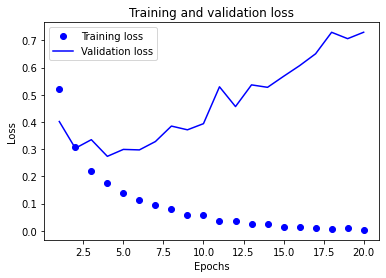

In [50]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plot the training and validation accuracy

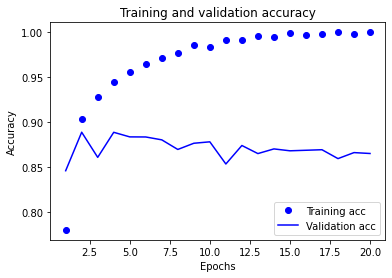

In [51]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Retrain the model from scratch

In [52]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 13ms/step - loss: 0.4820 - accuracy: 0.8127
Epoch 2/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2762 - accuracy: 0.9037
Epoch 3/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2097 - accuracy: 0.9284
Epoch 4/4
782/782 [==============================] - 3s 4ms/step - loss: 0.2894 - accuracy: 0.8857
